# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Source File

In [2]:
df_file1 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/HAproject-TheSpartianMartian/main/Data/AgeDataset-V1-Part1.csv")
df_file2 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/HAproject-TheSpartianMartian/main/Data/AgeDataset-V1-Part1.csv")
df_file3 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/HAproject-TheSpartianMartian/main/Data/AgeDataset-V1-Part1.csv")
df_file4 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/HAproject-TheSpartianMartian/main/Data/AgeDataset-V1-Part1.csv")
df_file5 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/HAproject-TheSpartianMartian/main/Data/AgeDataset-V1-Part1.csv")

In [3]:
df = pd.concat([df_file1, df_file2, df_file3, df_file4,df_file5], ignore_index=True)

In [4]:
df.to_csv('AgeDataset.csv', index = False)

# Data Cleaning

In [5]:
df = df.drop('Id', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Name               1250000 non-null  object 
 1   Short description  1245565 non-null  object 
 2   Gender             1191585 non-null  object 
 3   Country            1155160 non-null  object 
 4   Occupation         1177765 non-null  object 
 5   Birth year         1250000 non-null  int64  
 6   Death year         1249995 non-null  float64
 7   Manner of death    117760 non-null   object 
 8   Age of death       1249995 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 85.8+ MB


In [7]:
df.isna().sum()

Name                       0
Short description       4435
Gender                 58415
Country                94840
Occupation             72235
Birth year                 0
Death year                 5
Manner of death      1132240
Age of death               5
dtype: int64

In [8]:
df.dropna(axis=0, subset=['Death year'], inplace=True)
df.drop_duplicates(inplace=True)
df = df.drop(df.loc[(df['Age of death'] >123)].index)

df.isna().sum()

Name                      0
Short description       887
Gender                11683
Country               18967
Occupation            14445
Birth year                0
Death year                0
Manner of death      226446
Age of death              0
dtype: int64

In [9]:
columns=[col for col in df.columns if df[col].isnull().sum()>=1]
for col in columns:
    print( col, np.round(df[col].isnull().sum()*100/len(df[col])))

Short description 0.0
Gender 5.0
Country 8.0
Occupation 6.0
Manner of death 91.0


In [10]:
df['Death year'] = pd.to_numeric(df['Death year'], errors='coerce').fillna(0).astype(int)
df['Age of death'] = pd.to_numeric(df['Age of death'], errors='coerce').fillna(0).astype(int)

In [11]:
df.describe(include='all')

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
count,249998,249111,238315,231031,235553,249998.000000,249998.000000,23552,249998.000000
unique,241840,136556,13,3828,3283,NaN,NaN,129,NaN
top,Karl Müller,German theologian,Male,Germany,Artist,NaN,NaN,natural causes,NaN
freq,15,1885,217215,67699,73559,NaN,NaN,15717,NaN
mean,NaN,NaN,NaN,NaN,NaN,1816.032848,1885.082529,NaN,69.049680
std,NaN,NaN,NaN,NaN,NaN,219.719647,224.133185,NaN,16.469096
min,NaN,NaN,NaN,NaN,NaN,-2700.000000,-2659.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1812.000000,1879.000000,NaN,60.000000
50%,NaN,NaN,NaN,NaN,NaN,1884.000000,1952.000000,NaN,72.000000
75%,NaN,NaN,NaN,NaN,NaN,1917.000000,1994.000000,NaN,81.000000


In [12]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Eunuch; Male', 'Transgender Male', 'Eunuch', 'Intersex; Male',
       'Transgender Female; Female', 'Transgender Female; Male',
       'Female; Male'], dtype=object)

In [13]:
df_top_genders = df.groupby(['Gender'])['Gender'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
df_top_genders

,Gender,count
6,Male,217215
2,Female,21053
8,Transgender Female,15
1,Eunuch; Male,12
11,Transgender Male,8
4,Intersex,4
0,Eunuch,2
3,Female; Male,1
5,Intersex; Male,1
7,Non-Binary,1


In [14]:
Genders=['Male', 'Female']
df = df[df.Gender.isin(Genders)]

In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df_top_countries = df.groupby(['Country'])['Gender'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)
df_top_countries

,Country,count
1088,Germany,63153
3410,United States of America,32322
856,France,13750
80,Austria,9274
3304,United Kingdom,5721


In [17]:
df['Country'] = df['Country'].str.split(';').str[0]

In [18]:
df = df[df.Country.isin(df_top_countries['Country'])]

In [19]:
df['Manner of death']

0         natural causes
1         natural causes
2               homicide
6                    NaN
7         natural causes
               ...      
249988               NaN
249994               NaN
249997               NaN
249998               NaN
249999               NaN
Name: Manner of death, Length: 133614, dtype: object

In [20]:
df['Manner of death'] = df['Manner of death'].str.split(';').str[0]

<AxesSubplot:>

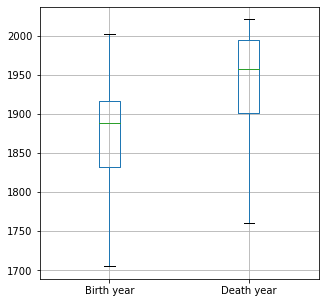

In [21]:
df_Years = pd.DataFrame(data = df, columns = ['Birth year','Death year'])
df_Years.boxplot(showfliers=False,grid=True,figsize=(5, 5))

In [22]:
df = df[df['Birth year'] >= 1800]

In [23]:
df.to_csv('AgeDataset-cleaned.csv', index = False)

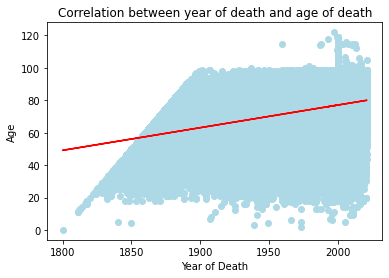

In [24]:
from sklearn.linear_model import LinearRegression
X = df.iloc[:, 6].values.reshape(-1, 1)  
Y = df.iloc[:, 8].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y,c='LightBlue')
plt.plot(X, Y_pred, color='red')
plt.title("Correlation between year of death and age of death")
plt.ylabel("Age")
plt.xlabel("Year of Death")
plt.show()

There is a positive correlation between Age of death and year of death. This shows that life expectancy has increased over time for subject having notability.

In [25]:
df_list_of_top_occupation = df['Occupation'].value_counts().head(20).reset_index()
df2 = df_list_of_top_occupation['index']
df3 =df[df['Occupation'].isin(df2)]

[Text(0, 0, 'Artist'),
 Text(1, 0, 'Politician'),
 Text(2, 0, 'Researcher'),
 Text(3, 0, 'Architect'),
 Text(4, 0, 'Teacher'),
 Text(5, 0, 'Athlete'),
 Text(6, 0, 'Military personnel'),
 Text(7, 0, 'Engineer'),
 Text(8, 0, 'Businessperson'),
 Text(9, 0, 'Cinematographer'),
 Text(10, 0, 'Entrepreneur'),
 Text(11, 0, 'Judge'),
 Text(12, 0, 'Journalist'),
 Text(13, 0, 'Publisher'),
 Text(14, 0, 'Physician'),
 Text(15, 0, 'Religious figure'),
 Text(16, 0, 'Philosopher'),
 Text(17, 0, 'Lawyer'),
 Text(18, 0, 'Astronomer'),
 Text(19, 0, 'Jurist')]

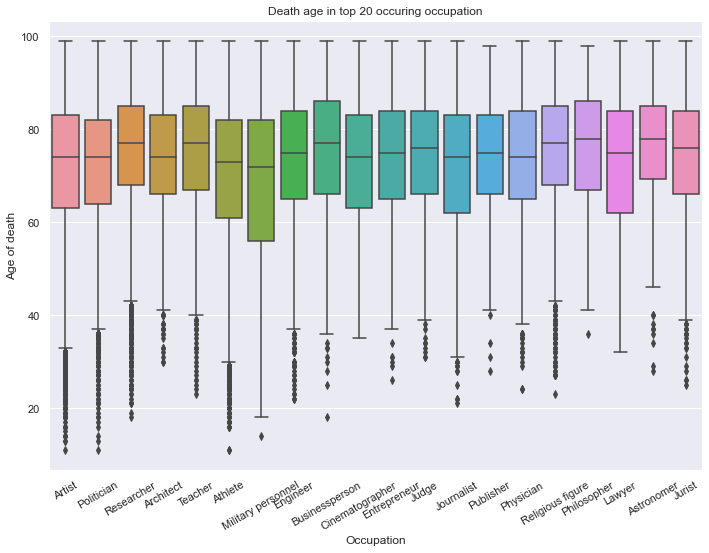

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.boxplot(x="Occupation", y="Age of death", data=df3)
sns_plot.set(title='Death age in top 20 occuring occupation')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=30)

In [27]:
#ML
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

In [28]:
df.isna().sum()

Name                     0
Short description        3
Gender                   0
Country                  0
Occupation            4955
Birth year               0
Death year               0
Manner of death      98776
Age of death             0
dtype: int64

In [29]:
columns=[col for col in df.columns if df[col].isnull().sum()>=1]
for col in columns:
    print( col, np.round(df[col].isnull().sum()*100/len(df[col])))

Short description 0.0
Occupation 4.0
Manner of death 89.0


In [30]:
df_orignal = df
df=df.drop(['Name','Short description','Manner of death'],axis=1)

In [31]:
encoder = preprocessing.LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Country'] = encoder.fit_transform(df['Country'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
#df['Manner of death'] = encoder.fit_transform(df['Manner of death'])

In [32]:
corr=df.corr()
corr.style.background_gradient(cmap='crest').set_precision(2)

C:\Users\sach\AppData\Local\Temp\ipykernel_12316\4141125781.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='crest').set_precision(2)


,Gender,Country,Occupation,Birth year,Death year,Age of death
Gender,1.00,-0.03,0.14,-0.10,-0.10,-0.03
Country,-0.03,1.00,-0.06,0.10,0.10,0.01
Occupation,0.14,-0.06,1.00,-0.19,-0.16,0.03
Birth year,-0.10,0.10,-0.19,1.00,0.93,0.01
Death year,-0.10,0.10,-0.16,0.93,1.00,0.38
Age of death,-0.03,0.01,0.03,0.01,0.38,1.00


In [33]:
X = df[df.columns[:5]] 
ss = preprocessing.StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [34]:
X

,Gender,Country,Occupation,Birth year,Death year
0,0.327224,0.482170,-1.100308,1.567885,0.888599
1,0.327224,1.305613,0.790490,-2.190429,-2.418701
2,0.327224,-1.164716,-1.100308,-0.114158,0.280639
3,0.327224,-1.164716,-1.100308,-1.375690,-0.935280
4,0.327224,1.305613,-1.100308,1.121092,0.304958
...,...,...,...,...,...
110697,0.327224,-1.164716,0.790490,0.700581,0.523823
110698,0.327224,-1.164716,1.553896,-0.955179,-0.789370
110699,0.327224,-1.164716,-1.045549,0.726863,1.229056
110700,0.327224,0.482170,0.331481,-1.007743,-0.473231


In [35]:
y = df['Age of death']

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

In [37]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (83026, 5)
y_train (83026,)
X_test (27676, 5)
y_test (27676,)


### KNeighborsClassifier

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = KNclassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

acc_knc = accuracy_score(y_test, y_pred)

# Evaluate the results
# Evaluate the results
#print("confusion matrix", confusion_matrix(y_test, y_pred))
print("acuracy", acc_knc)
print("recall", recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("precision", precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score", f1_score(y_test, y_pred, pos_label='positive',average='micro'))

acuracy 0.26557305969070677
recall 0.26557305969070677
precision 0.26557305969070677
f1 score 0.26557305969070677


C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# GaussianNB

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Predicting the Test set results
y_pred = gnb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

acc_gnb = accuracy_score(y_test, y_pred)

# Evaluate the results
# Evaluate the results
#print("confusion matrix", confusion_matrix(y_test, y_pred))
print("acuracy", acc_gnb)
print("recall", recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("precision", precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score", f1_score(y_test, y_pred, pos_label='positive',average='micro'))

acuracy 0.006503830033241798
recall 0.006503830033241798
precision 0.006503830033241798
f1 score 0.006503830033241798


C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### DecisionTreeClassifier

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
dtcclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dtcclassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

acc_dcc = accuracy_score(y_test, y_pred)

# Evaluate the results
# Evaluate the results
#print("confusion matrix", confusion_matrix(y_test, y_pred))
print("acuracy", acc_dcc)
print("recall", recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("precision", precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score", f1_score(y_test, y_pred, pos_label='positive',average='micro'))

acuracy 0.9533892180951005
recall 0.9533892180951005
precision 0.9533892180951005
f1 score 0.9533892180951005


C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### RandomForestClassifier

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfclassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

acc_rfc = accuracy_score(y_test, y_pred)

# Evaluate the results
# Evaluate the results
#print("confusion matrix", confusion_matrix(y_test, y_pred))
print("acuracy", acc_rfc)
print("recall", recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("precision", precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score", f1_score(y_test, y_pred, pos_label='positive',average='micro'))

acuracy 0.6235727706315941
recall 0.6235727706315941
precision 0.6235727706315941
f1 score 0.6235727706315941


C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVC

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting classifier to the Training set
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = svcclassifier.fit(X_train, y_train).predict(X_test)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

acc_svc = accuracy_score(y_test, y_pred)

# Evaluate the results
# Evaluate the results
#print("confusion matrix", confusion_matrix(y_test, y_pred))
print("acuracy", acc_svc)
print("recall", recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("precision", precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score", f1_score(y_test, y_pred, pos_label='positive',average='micro'))

acuracy 0.32638387050151757
recall 0.32638387050151757
precision 0.32638387050151757
f1 score 0.32638387050151757


C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sach\anaconda3\envs\DAB200\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [43]:
df

,Gender,Country,Occupation,Birth year,Death year,Age of death
1,1,3,84,1952,2001,49
2,1,4,1258,1809,1865,56
6,1,1,84,1888,1976,88
7,1,1,84,1840,1926,86
10,1,4,84,1935,1977,42
...,...,...,...,...,...,...
249988,1,1,1258,1919,1986,67
249994,1,1,1732,1856,1932,76
249997,1,1,118,1920,2015,95
249998,1,3,973,1854,1945,91


In [44]:
df['pred_KNclassifier']=KNclassifier.predict(X)


In [45]:
df['pred_gnb']=gnb.predict(X)


In [46]:
df['pred_dtcclassifier']=dtcclassifier.predict(X)


In [47]:
df['pred_rfclassifier']=rfclassifier.predict(X)

In [48]:
df['pred_svcclassifier']=svcclassifier.predict(X)

In [49]:
df['Name']= df_orignal['Name']
df=df.round(0)
df=df.drop(['Gender','Country','Occupation','Birth year'], axis=1)

df['KNclassifie_gap']=df['Age of death']-df['pred_KNclassifier']
df['gnb_gap']=df['Age of death']-df['pred_gnb']
df['dtcclassifier_gap']=df['Age of death']-df['pred_dtcclassifier']
df['rfclassifier_gap']=df['Age of death']-df['pred_rfclassifier']
#df['svcclassifie_gap']=df['Age of death']-df['pred_svcclassifier']

In [50]:
df

,Death year,Age of death,pred_KNclassifier,pred_gnb,pred_dtcclassifier,pred_rfclassifier,pred_svcclassifier,Name,KNclassifie_gap,gnb_gap,dtcclassifier_gap,rfclassifier_gap
1,2001,49,46,14,49,49,49,Douglas Adams,3,35,0,0
2,1865,56,56,14,56,56,57,Abraham Lincoln,0,42,0,0
6,1976,88,89,85,88,88,87,Paul Morand,-1,3,0,0
7,1926,86,83,70,86,83,85,Claude Monet,3,16,0,3
10,1977,42,42,14,42,42,43,Elvis Presley,0,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249988,1986,67,62,85,67,67,68,Jean Tourane,5,-18,0,0
249994,1932,76,73,100,76,76,77,"Joachim, 5th Prince Murat",3,-24,0,0
249997,2015,95,94,85,95,95,94,Robert Bonnaventure,1,10,0,0
249998,1945,91,83,14,91,91,90,Napier Shaw,8,77,0,0


In [51]:
from tabulate import tabulate

data =   [["Naive Bayes", acc_gnb],
                ["Random Forest Model", acc_rfc], 
                ["Decision Tree", acc_dcc],
                ["KNN", acc_knc],["SVC", acc_svc]]

col_names = ["Model_Name", "Classification Accuracy"]

print(tabulate(data, headers=col_names, tablefmt="grid"))

+---------------------+---------------------------+
| Model_Name          |   Classification Accuracy |
+=====================+===========================+
| Naive Bayes         |                0.00650383 |
+---------------------+---------------------------+
| Random Forest Model |                0.623573   |
+---------------------+---------------------------+
| Decision Tree       |                0.953389   |
+---------------------+---------------------------+
| KNN                 |                0.265573   |
+---------------------+---------------------------+
| SVC                 |                0.326384   |
+---------------------+---------------------------+
